# Spotify Popularity Prediction using Machine Learning Models
### Summer Yang

# Goals
I want to analyze music popularity trends using a Spotify dataset because I’ve always enjoyed music and attending concerts, and I’m curious about what makes certain songs more popular than others. This project aims to explore how musical characteristics such as danceability, energy, valence, tempo, and loudness influence a track’s success. To do this, I will train a series of predictive machine learning modeling, including Random Forest, Gradient Boost, and Support Vector Machines. These models will help uncover patterns in the data and predict a song’s popularity score (0–100). The project is highly relevant to the music industry—artists, producers, and streaming platforms can leverage the insights to refine production choices, optimize song releases, personalize playlists, and enhance user engagement. By combining data science with music, this analysis opens up new possibilities for understanding listener behavior, forecasting trends, and driving innovation in how music is created, marketed, and consumed.

# Background Knowledge
1. **Growth and Trends in Music Streaming**

Streaming music consumption in the US has grown, but at a slower pace compared to previous years. In 2024, on-demand audio streams increased by 6.4%, reaching 1.4 trillion streams, but this rate of growth was significantly lower than the 12.7% growth of the prior year (Luminate, 2025). However, global streaming trends show a higher growth rate, with on-demand audio streams expanding by 14% to 14.8 trillion globally, with rapid growth outside the US, especially in international markets. Understanding these patterns helps contextualize the popularity of songs on a global scale and why certain tracks may perform better in specific regions.

*US Music Streaming Consumption Grew Again Last Year, but at a Slower Rate.* MarketingCharts. (n.d.).

2. **Similar Research**

This paper by Prashant Pareek1, Poorna Shankar, Pushpak Pathak, and Nidhi Sakariya explores Spotify music metrics and use them in a Machine Learning Algorithm. From this paper, I learned that Spotify’s data can be used to predict the capability of a song to be popular before its release with the help of attributes like loudness, energy, acousticness, etc., which is defined when the song is being made. In their study, they predicted the popularity of the song using the song metrics available in Spotify by applying Random Forest classifier, K-Nearest Neighbour classifier, and Linear Support Vector classifier to compare which of these models can effectively predict the popularity.

Pareek, P., Shankar, P., Pathak, P., & Sakariya, N. (2022). Predicting music popularity using machine learning algorithm and music metrics available in Spotify. *Journal of Development Economics and Management Research Studies (JDMS)*, 9(11), 10-19.

3. **Spotify Audio Features**

Spotify provides detailed audio features for each track, which can be used to analyze and predict music popularity. These features are numerical representations of various musical characteristics that describe a song's composition and feel. These features are crucial for analyzing trends in music popularity. According to the study, metrics like danceability, energy, loudness, and valence play significant roles in determining whether a song will resonate with listeners and gain popularity on Spotify​.

Pareek, P., Shankar, P., Pathak, P., & Sakariya, N. (2022). Predicting music popularity using machine learning algorithm and music metrics available in Spotify. *Journal of Development Economics and Management Research Studies (JDMS)*, 9(11), 10-19.


# Dataset Introduction
I have downloaded two datasets from Kaggle (https://www.kaggle.com/datasets/solomonameh/spotify-music-dataset). One dataset contains 1686 songs with a popularity score above 68. The other dataset contains 3145 songs with a popularity score under 68. Both datasets have 29 variables and are sourced from Spotify API. These datasets will be merged together for this analysis.

### Audio Features
Spotify’s audio features are generated using signal processing algorithms and machine learning models developed by Spotify’s audio analysis system. When a song is entered into Spotify's database, the system analyzes the raw audio signal to extract measurable, quantitative descriptors. 

-   **Energy**: Measures how intense and active a track feels. Energetic songs tend to be fast, loud, and dynamic.
-   **Tempo**: The speed of a song, measured in beats per minute (BPM). A higher BPM means a faster song.
-   **Danceability**: A score (0 to 1) that predicts how easy it is to dance to a song. It's based on a mix of tempo, beat strength, rhythm stability, and overall flow. Higher values mean a better dance track.
-   **Loudness**: The average volume level of a track, measured in decibels (dB). Higher values indicate louder songs.
-   **Liveness**: Estimates whether a song was recorded live. Higher values suggest more audience presence, like in concert recordings.
-   **Valence**: Describes the mood of a song. A high score means the track sounds happy and upbeat, while a low score suggests a sad or moody vibe.
-   **Speechiness**: Measures how much of the song is spoken rather than sung. High values indicate mostly speech, like podcasts or rap.
-   **Instrumentalness**: Predicts whether a song has vocals. Values closer to 1 mean the track is mostly instrumental.
-   **Mode**: Tells whether the song is in a major (happy/bright) or minor (sad/melancholic) key.
-   **Key**: The main musical key of the song, represented by a number from 0 to 11. Each number corresponds to a musical note (e.g., 0 = C, 1 = C♯/D♭, etc.).
-   **Duration**: The length of the song, measured in milliseconds.
-   **Acousticness**: Estimates how "acoustic" a track is, with values closer to 1 meaning it's mostly unplugged or natural-sounding.
-   **Time Signature**: Describes the rhythm structure of a track, indicating the number of beats per bar (e.g., 3/4, 4/4)

### Descriptive Features
-   **Track Name**: The song title.
-   **Track Artist**: The artist(s) who performed the song.
-   **Track Album Name**: The album where the song appears.
-   **Track Album Release Date**: The album’s release date.
-   **Track ID**: A unique Spotify identifier for the song.
-   **Track Album ID**: A unique Spotify identifier for the album.
-   **Playlist Name**: The name of the playlist that features the song.
-   **Playlist Genre**: The general genre of the playlist (e.g., pop, rock, jazz).
-   **Playlist Subgenre**: A more specific genre label (e.g., indie pop, punk rock).
-   **Playlist ID**: A unique Spotify identifier for the playlist.
-   **Track Href**: A hyperlink to the Spotify Web API endpoint for detailed track information.
-   **URI**: The unique Spotify Uniform Resource Identifier for the track, used for locating the song within the Spotify platform.
-   **Analysis URL**: A link to the detailed audio analysis of the track provided by Spotify.
-   **ID**: A general identifier for the song, used for internal dataset tracking.
-   **Track Popularity**: A score from 0 to 100 that reflects how popular the song is, based on total streams compared to other tracks.


# Preprocess Data

In [25]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

high_pop = pd.read_csv('high_popularity_spotify_data.csv')
low_pop = pd.read_csv('low_popularity_spotify_data.csv')

spotify = pd.concat([high_pop, low_pop])
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4831 entries, 0 to 3144
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4830 non-null   float64
 1   tempo                     4830 non-null   float64
 2   danceability              4830 non-null   float64
 3   playlist_genre            4831 non-null   object 
 4   loudness                  4830 non-null   float64
 5   liveness                  4830 non-null   float64
 6   valence                   4830 non-null   float64
 7   track_artist              4831 non-null   object 
 8   time_signature            4830 non-null   float64
 9   speechiness               4830 non-null   float64
 10  track_popularity          4831 non-null   int64  
 11  track_href                4830 non-null   object 
 12  uri                       4830 non-null   object 
 13  track_album_name          4830 non-null   object 
 14  playlist_name

### Check for missing values

In [26]:
print(spotify.isnull().sum().sort_values(ascending=False))

spotify[spotify.isnull().any(axis=1)]

energy                      1
mode                        1
key                         1
duration_ms                 1
acousticness                1
analysis_url                1
tempo                       1
track_album_name            1
uri                         1
track_href                  1
id                          1
speechiness                 1
time_signature              1
valence                     1
liveness                    1
loudness                    1
type                        1
danceability                1
instrumentalness            1
playlist_subgenre           0
playlist_name               0
track_album_id              0
track_album_release_date    0
track_name                  0
track_id                    0
track_popularity            0
track_artist                0
playlist_genre              0
playlist_id                 0
dtype: int64


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
665,0.926,105.969,0.682,k-pop,-2.515,0.19,0.86,NAYEON,4.0,0.0607,...,0.0,5zQI9dFbS9TrhvC9clgjz7,0.0,3.0,162840.0,0.0404,0V2passWyAXnON67kfAj7y,modern,audio_features,1bNuDsel3P60p11Z7vfHMR
263,NaN,NaN,NaN,lofi,NaN,NaN,NaN,Berhanio,NaN,NaN,...,NaN,4X9vWjNWlZ3qAtyDZ2ZhDj,NaN,NaN,NaN,NaN,NaN,chill,NaN,37i9dQZF1DX8Uebhn9wzrS


In [27]:
spotify_clean = spotify.dropna().reset_index(drop=True)

I combined two separate CSV files, one for high popularity songs and one for low popularity songs, into a single dataset. After merging, I inspected the dataset and found that a few rows contained missing values across multiple columns. Because the number of missing rows was very small relative to the full dataset, I chose to drop these rows to maintain data integrity and avoid complications during modeling.

### Drop Unnecessary Columns

In [28]:
cols_drop = [
    'track_href', 'uri', 'analysis_url', 'id', 'type', 'track_album_id',
    'track_album_name', 'playlist_id', 'playlist_name'
]

spotify_clean.drop(columns=cols_drop, inplace=True)

Some columns in the dataset were not useful for modeling and could add unnecessary complexity. These included:
-   Unique identifiers and URLs (e.g., *track_href, uri, analysis_url, id, type*) which are specific to  Spotify’s platform and carry no predictive value.
-   Highly specific identifiers and text-heavy metadata (e.g., *track_album_id, track_album_name, playlist_id, playlist_name*), which contain too many unique values (high cardinality).

By removing these columns, I simplified the dataset and kept only the variables that provide meaningful information for predicting song popularity.

### Create a Release Year variable from the Track Album Release Date

In [29]:
spotify_clean['year_released'] = spotify_clean['track_album_release_date'].str.extract(r'(\d{4})')
spotify_clean['year_released'] = spotify_clean['year_released'].astype(float).astype('int')

spotify_clean.drop(columns='track_album_release_date', inplace=True)

The original dataset included a *track_album_release_date*, but it was stored as a full date string. For modeling, I extracted the release year to create a new feature called year_released. This allowed me to analyze how the timing of a song’s release might impact its popularity (e.g., newer songs may receive more streams). I then dropped the original date column since the full date was no longer needed.

### Artist Feature Cleaning

In [30]:
print(spotify_clean['track_artist'].nunique())

# Count number of tracks per artist
artist_counts = spotify_clean['track_artist'].value_counts()

# View frequency breakdown
frequency_summary = artist_counts.value_counts().sort_index()
print("Number of Artists Appearing N Times:")
print(frequency_summary)

# Artists with at least 5 appearances
important_artists = artist_counts[artist_counts >= 5].index

# Create new feature
spotify_clean['artist_filtered'] = spotify_clean['track_artist'].apply(
    lambda x: x if x in important_artists else 'Other'
)
spotify_clean.drop(columns='track_artist', inplace=True)

spotify_clean.head()

3388
Number of Artists Appearing N Times:
count
1     2720
2      405
3      109
4       63
5       28
6       18
7       13
8       11
9        5
10       4
11       3
13       1
14       1
16       1
18       2
19       1
21       1
26       1
30       1
Name: count, dtype: int64


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,time_signature,speechiness,track_popularity,track_id,track_name,instrumentalness,mode,key,duration_ms,acousticness,playlist_subgenre,year_released,artist_filtered
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,3.0,0.0304,100,2plbrEY59IikOBgBGLjaoe,Die With A Smile,0.0000,0.0,6.0,251668.0,0.3080,mainstream,2024,Other
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,4.0,0.0358,97,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,0.0608,1.0,2.0,210373.0,0.2000,mainstream,2024,Billie Eilish
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,4.0,0.0368,93,7ne4VBA60CxGM75vw0EYad,That’s So True,0.0000,1.0,1.0,166300.0,0.2140,mainstream,2024,Gracie Abrams
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,4.0,0.0634,81,1d7Ptw3qYcfpdLNL5REhtJ,Taste,0.0000,0.0,0.0,157280.0,0.0939,mainstream,2024,Sabrina Carpenter
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,4.0,0.2600,98,5vNRhkKd0yEAg8suGBpjeY,APT.,0.0000,0.0,0.0,169917.0,0.0283,mainstream,2024,Other


There are 2,720 artists who appear only once in the dataset, which is not reliable for modeling, while the artist with the most songs appears 30 times. The goal is to include artists only when it contributes meaningful information, meaning artists who have enough songs to learn a pattern and appear frequently enough to reduce overfitting risk. I set the threshold to 5 appearances, so I am keeping artists who appear at least 5 times in the variable *artist_filtered*, which is the point where sample size begins to allow pattern learning. This captures 91 artists, which is still small enough for one-hot encoding, but large enough to represent artists with enough data to learn meaningful patterns. All others will be grouped as "Other".

### Encode Categorical Variables

In [31]:
# Create a copy of the cleaned dataset before encoding for data summary
spotify_summary = spotify_clean.copy()

from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['playlist_genre', 'playlist_subgenre', 'artist_filtered']
encoder = OneHotEncoder(drop=None, sparse_output=False)
encoded_categorical = encoder.fit_transform(spotify_clean[categorical_cols])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))
spotify_clean = pd.concat([spotify_clean.drop(columns=categorical_cols), encoded_df], axis=1)

The dataset included three categorical columns: playlist_genre, playlist_subgenre, and artist_filtered (created in the previous step). Machine learning models require numerical input, so I used one-hot encoding to convert these text categories into binary indicator columns. This transformation preserves the categorical information in a format that models can understand and use for prediction, while also avoiding the assumption of order that comes with label encoding.

# Data Summary
To better understand the structure and contents of the dataset before applying machine learning, I conducted a data summary that provides key insights into the number of songs, the distribution of popularity scores, the most common genres, and the ranges of important audio features.


### Number of songs and number of features

In [32]:
# List all numeric columns
numeric_cols = spotify_summary.select_dtypes(include='number').columns.tolist()

# Remove target
excluded_cols = ['track_popularity']
num_features_list = [col for col in numeric_cols if col not in excluded_cols]

# Display the result
print(f"Number of songs: {spotify_summary.shape[0]}")
print(f"Number of numerical audio features (excluding target): {len(num_features_list)}")
print("Included features:")
print(num_features_list)


Number of songs: 4829
Number of numerical audio features (excluding target): 14
Included features:
['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence', 'time_signature', 'speechiness', 'instrumentalness', 'mode', 'key', 'duration_ms', 'acousticness', 'year_released']


I started by checking how many songs and audio features were in the dataset. There are 4,829 songs, and after removing the target variable (*track_popularity*) and track identifiers(*track_id, track_name*), there are 14 numerical audio features. This gives us a reasonably large dataset with enough features to train predictive models, while still being manageable to analyze and visualize.

### Basic track popularity stats

In [33]:
spotify_summary['track_popularity'].describe()

count    4829.000000
mean       54.758335
std        19.830824
min        11.000000
25%        41.000000
50%        56.000000
75%        72.000000
max       100.000000
Name: track_popularity, dtype: float64

Using descriptive statistics, I explored the distribution of the *track_popularity* score, which ranges from 11 to 100, with a median of 56. The average popularity score is around 55, with a standard deviation of nearly 20, indicating a fairly wide spread in song popularity. These statistics show that the dataset includes both very popular and less popular songs, which is ideal for modeling since it allows us to learn what differentiates them.

### Top 10 most common playlist genres

In [34]:
spotify_summary['playlist_genre'].value_counts().head(10)

playlist_genre
electronic    589
pop           515
latin         425
hip-hop       395
ambient       359
rock          345
lofi          298
world         228
arabic        208
brazilian     148
Name: count, dtype: int64

I looked at the most frequent genres to understand the musical diversity in the dataset. The top genres include electronic, pop, latin, hip-hop, and ambient, which together reflect a wide variety of musical styles and global trends. Knowing the genre distribution helps frame the context of our model. Genres like pop and electronic may naturally have higher popularity, and the model will need to account for that.

### Ranges of Audio Features

In [35]:
audio_features = ['danceability', 'energy', 'valence', 'tempo', 'loudness']
spotify_summary[audio_features].agg(['min', 'max']).T

,min,max
danceability,0.058900,0.979
energy,0.000202,0.998
valence,0.029600,0.987
tempo,48.232000,241.426
loudness,-48.069000,1.318


I reviewed the range of values for key audio features like *danceability, energy, valence, tempo,* and *loudness*:
-   *danceability, energy, and valence* are all normalized between 0 and 1, showing that songs span a wide emotional and rhythmic spectrum.
-   *tempo* ranges from 48 to 241 BPM, covering slow ballads to fast-paced dance tracks.
-   *loudness* ranges from -48 to +1 dB, capturing both soft acoustic and loud electronic songs.

Understanding these ranges helps with feature scaling, interpretation, and detecting potential outliers during modeling.

# Visualizations
### Distribution of Track Popularity

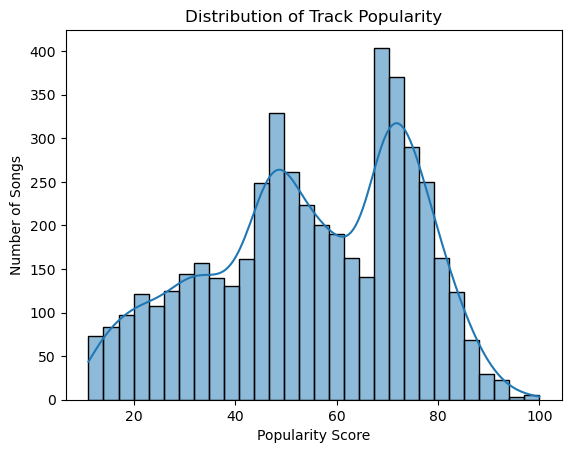

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(spotify_summary['track_popularity'], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Number of Songs")
plt.show()

This histogram visualizes the distribution of track popularity scores across the dataset. Each bar represents the number of songs falling within a specific popularity range, while the smooth line shows the overall shape using a kernel density estimate. The distribution is clearly non-normal, with two prominent peaks. This bimodal pattern suggests the presence of distinct groups of songs in terms of popularity, potentially reflecting a divide between niche or less-promoted tracks and widely consumed mainstream hits. However, this separation is likely a result of combining the two original datasets—one containing low popularity songs and another containing high popularity songs—rather than a naturally occurring distribution. Recognizing this structure is important for modeling because it suggests that models assuming linear or normally distributed residuals may be less appropriate, and it supports the decision to use non-parametric or ensemble methods like Random Forest or Gradient Boosting, which are robust to skewed and multimodal distributions.

### Boxplot of Popularity by Playlist Genre

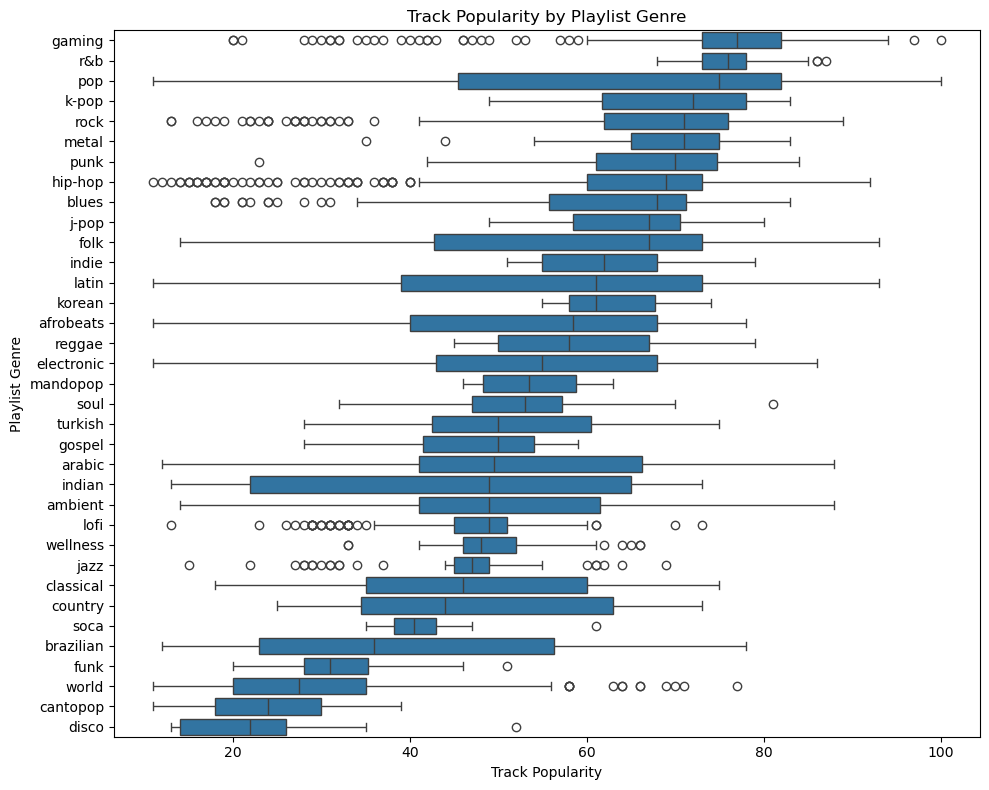

In [37]:
# Order genres by decreasing median popularity
genre_order = (
    spotify_summary.groupby('playlist_genre')['track_popularity']
    .median()
    .sort_values(ascending=False)
    .index
)

# Set playlist_genre as a categorical variable with the defined order
spotify_summary['playlist_genre'] = pd.Categorical(
    spotify_summary['playlist_genre'], categories=genre_order, ordered=True
)

plt.figure(figsize=(10, 8))
sns.boxplot(data=spotify_summary, y='playlist_genre', x='track_popularity', orient='h')
plt.title("Track Popularity by Playlist Genre")
plt.xlabel("Track Popularity")
plt.ylabel("Playlist Genre")
plt.tight_layout()
plt.show()

This horizontal boxplot shows the distribution of Track Popularity scores across different Playlist Genre categories. Genres are sorted in descending order by median popularity, allowing for easy comparison. This plot shows that genres like gaming, r&b, and pop tend to have higher median popularity, while genres like disco, cantopop, and world have lower medians. The spread of each box indicates variability within each genre. This plot is useful because it helps identify which genres are more likely to contain popular songs. These insights can inform both model feature selection and music marketing strategies.

# Model Training and Evaluation

In this section, I trained three machine learning models-Random Forest, Gradient Boosting, and Support Vector Machine—to predict track popularity based on audio features and playlist metadata. Random Forest is an ensemble method that builds multiple decision trees and averages their predictions, making it robust to noise and overfitting. Gradient Boosting is another ensemble technique that builds trees sequentially, with each one correcting the errors of the previous, allowing it to capture complex patterns effectively. Support Vector Regression (SVR) attempts to fit the best possible function within a margin of tolerance, making it powerful for modeling non-linear relationships. I used pipelines with grid search and cross-validation to tune hyperparameters and ensure reliable evaluation. The data was split into training and test sets to assess generalization, and model performance was compared using RMSE and R^2 scores to determine the most effective approach.

### Train/Test Split

In [38]:
from sklearn.model_selection import train_test_split

# Features and target
X = spotify_clean.drop(columns=['track_popularity', 'track_id', 'track_name'], errors='ignore')
y = spotify_clean['track_popularity']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48583553)

### Random Forest

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create Pipeline
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', RandomForestRegressor(random_state=48583553))
])

# Define hyperparameter grid
rf_params = {
    'reg__n_estimators': [50, 100],
    'reg__max_depth': [None, 5, 10]
}

# Grid search with 5-fold CV
rf_grid = GridSearchCV(rf_pipe, rf_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)


### Gradient Boost

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# Create Pipeline
gb_pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('reg', GradientBoostingRegressor(random_state=48583553))
])

# Define hyperparameter grid
gb_params = {
    'reg__n_estimators': [100, 200],
    'reg__learning_rate': [0.05, 0.1],
    'reg__max_depth': [3, 5]
}

# Grid search with 5-fold CV
gb_grid = GridSearchCV(gb_pipe, gb_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)

# Fit on training data
gb_grid.fit(X_train, y_train)

# Predict on test data
best_gb_model = gb_grid.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate performance
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
gb_r2 = r2_score(y_test, y_pred_gb)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


### Support Vector Machine

In [41]:
from sklearn.svm import SVR

# Create Pipeline
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', SVR())
])

# Define hyperparameter grid
svm_params = {
    'reg__kernel': ['rbf'],
    'reg__C': [1, 10],
    'reg__epsilon': [0.1, 0.2]
}

# Grid search with 5-fold CV
svm_grid = GridSearchCV(
    svm_pipe,
    svm_params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
svm_grid.fit(X_train, y_train)

# Predict on test data
best_svm_model = svm_grid.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate performance
svm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))
svm_r2 = r2_score(y_test, y_pred_svm)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


# Model Comparison

Random Forest Results (Test Set Evaluation):
     Best Params: {'reg__max_depth': None, 'reg__n_estimators': 100}
     RMSE: 10.99
     R² Score: 0.68
 
Gradient Boosting Results (Test Set Evaluation):
     Best Params: {'reg__learning_rate': 0.1, 'reg__max_depth': 5, 'reg__n_estimators': 200}
     RMSE: 10.55
     R^2 Score: 0.71
 
Support Vector Machine Results (Test Set Evaluation):
     Best Params: {'reg__C': 10, 'reg__epsilon': 0.2, 'reg__kernel': 'rbf'}
     RMSE: 10.81
     R² Score: 0.69


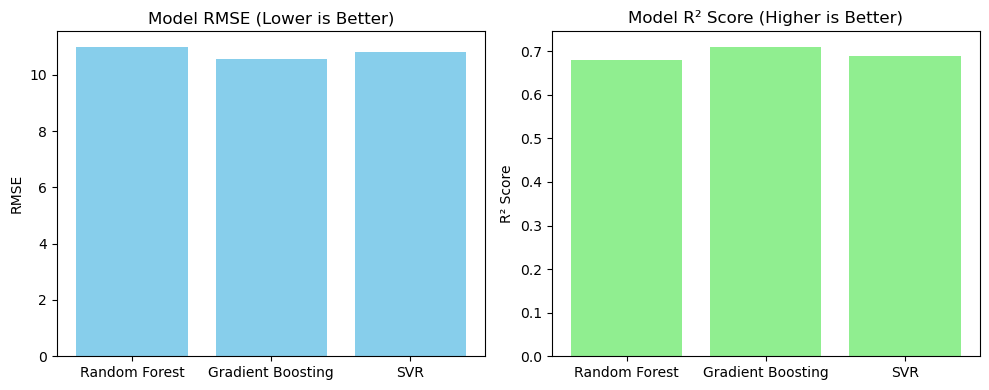

In [42]:
print("Random Forest Results (Test Set Evaluation):")
print("     Best Params:", rf_grid.best_params_)
print(f"     RMSE: {rf_rmse:.2f}")
print(f"     R² Score: {rf_r2:.2f}")
print(" ")
print("Gradient Boosting Results (Test Set Evaluation):")
print("     Best Params:", gb_grid.best_params_)
print(f"     RMSE: {gb_rmse:.2f}")
print(f"     R^2 Score: {gb_r2:.2f}")
print(" ")
print("Support Vector Machine Results (Test Set Evaluation):")
print("     Best Params:", svm_grid.best_params_)
print(f"     RMSE: {svm_rmse:.2f}")
print(f"     R² Score: {svm_r2:.2f}")

# Visual
models = ['Random Forest', 'Gradient Boosting', 'SVR']
rmse_scores = [10.99, 10.55, 10.81]
r2_scores = [0.68, 0.71, 0.69]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(models, rmse_scores, color='skyblue')
plt.title("Model RMSE (Lower is Better)")
plt.ylabel("RMSE")

plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color='lightgreen')
plt.title("Model R² Score (Higher is Better)")
plt.ylabel("R² Score")

plt.tight_layout()
plt.show()

Gradient Boosting performed the best overall with the lowest RMSE (10.55) and highest R^2 score (0.71), indicating it captured the most variance in song popularity. SVR and Random Forest both performed reasonably well, with SVR slightly outperforming Random Forest in both metrics. All models achieved R^2 scores between 0.68 and 0.71, which shows they’re all capturing meaningful patterns, but there’s still room for improvement (e.g., with feature engineering, ensembling, or additional data).

### Feature Importance Plot

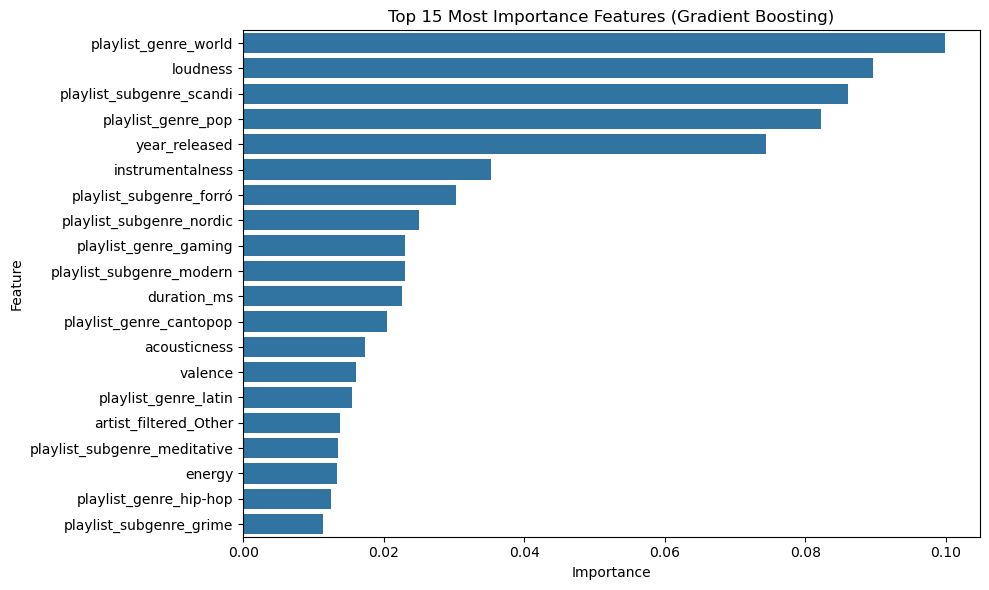

In [43]:
# Extract feature importances from the best Gradient Boosting model
importances = best_gb_model.named_steps['reg'].feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature')
plt.title("Top 15 Most Importance Features (Gradient Boosting)")
plt.tight_layout()
plt.show()

This feature importance plot for the Gradient Boosting model shows which audio and categorical features had the greatest influence on predicting track popularity. This type of visualization helps interpret how the model makes decisions and can offer valuable insights to industry stakeholders, such as producers, marketers, or playlist curators. The most important feature was *playlist_genre_world*, suggesting that songs associated with globally oriented playlists tend to receive higher popularity scores—possibly due to broader exposure across international audiences. *Loudness* was also highly influential, supporting the idea that louder songs, which may sound more dynamic or polished, tend to perform better. Genre-related variables such as *playlist_subgenre_scandi* and *playlist_genre_pop* also ranked near the top, reinforcing the impact of musical style and playlist categorization on streaming performance. *Year_released* was another top predictor, implying that more recently released songs tend to garner more popularity—likely due to trends in streaming algorithms and listener preferences for newer content. Overall, the plot highlights a blend of acoustic qualities and metadata as key drivers of track popularity.


# Conclusion

This project set out to explore the factors that make songs popular on Spotify, using a dataset of audio features and playlist metadata to train machine learning models. The goal was to predict track popularity scores and identify which musical characteristics contribute most to a song’s success. After evaluating multiple models, Gradient Boosting emerged as the best performer, with the lowest RMSE and highest R^2 score. Random Forest and Support Vector Machine also performed reasonably well. The findings revealed that certain genres like world and pop, loudness, and recency of release were consistently important in predicting popularity. These results are valuable for stakeholders in the music industry. Streaming platforms, producers, and record labels could use these insights to better target playlists, refine song production, and optimize release strategies. While the models don’t account for all the cultural or promotional factors that drive popularity, they offer a strong starting point for data-informed decision-making. This project shows that data science can be harmonized with the creative process to understand why certain songs resonate, and it suggest that popularity is not entirely random, but rooted in quantifiable elements of music.
